# Cryptocurrency Price Prediction with Deep Learning algorithms (DSULS)

### What is a cryptocurrency?

Cryptocurrency can be considered an alternative currency which addresses the drawbacks of the fiat currency, for example:

<li>Fiat currency is controlled by the government and not backed by a physical commodity such as gold or silver, which consitutes a risk of hyperinflation. </li>
<li>The existing ledger which keeps records of all transactions are prone to manipulation and violation. </li>
<li>Transactions of fiat currency is overseen by intermediaries and financial institutions, which can be costly and time-consuming.</li>




### Bitcoin 

Bitcoin is the world's first cryptocurrency, designed by an anonymous group or individual known as Satoshi Nakamoto. To date, Bitcoin remains the cryptocurrency with the highest market capitalization. Some of the inherent characteristics of Bitcoin addresses the drawbacks of fiat currency. For instance:
<li>Bitcoin operates on the premise of a peer-to-peer network which allows users to transact between each other directly and eliminates the need for intermediaries to oversee the transaction.</li>
<li>Bitcoin is built upon blockchain technology which is a distributed ledger that stores all transaction records on the blockchain network.</li>
<li>The transaction records are stored as blocks and secured with a cryptographic hash value of the current and previous block, which forms a chain of blocks that are immutable, secure and near impossible to tamper with.</li>

As the cryptocurrency market displays enormous potential for growth, it has attracted many people including corporates, financial institutions and hedge funds to invest in cryptocurrencies. However, cryptocurrencies are also extremely volatile, owing to factors such as:
<li>Market factors - popularity, speculations and market trends</li>
<li>Macro-financial factors - exchange rates, gold price and stock markets</li>
<li>Political factors - legal adaptations or restrictions</li>
<li>Supply and demand - coins in circulation, mining difficulty and hash rates</li>

This leads to many attempts by researchers to predict the volatile market behaviour of cryptocurrencies. The price forecast of cryptocurrency could prove invaluable as 
<li>It helps individual investors make an informed decision while investing in cryptocurrencies</li>
<li>Sheds light on the market behaviour of cryptocurrency for the understanding of financial researchers</li>
<li>Assists in the decision making process for policies to regulate the cryptocurrency market.

## Importing the libraries and data

In [1]:
# To ensure reproducibility of the experiments
import os 
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import random as rn

In [3]:
#Importing data
btc_ds = pd.read_csv("C:\Project Directories\Bitcoin-Price-Prediction-LSTM\Data\coin_Bitcoin.csv")

In [4]:
#View first five rows of data
btc_ds.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
#Setting date as index 
btc_ds = btc_ds.set_index("Date")

#Changing the index to datetime format
btc_ds.index = pd.to_datetime(btc_ds.index)

btc_ds.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## Exploratory Data Analysis

In [6]:
#Check and see if there are any missing values
btc_ds.isna().sum()

SNo          0
Name         0
Symbol       0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
#Generate descriptive statistics for each column
btc_ds.iloc[:, -6:].describe()

,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


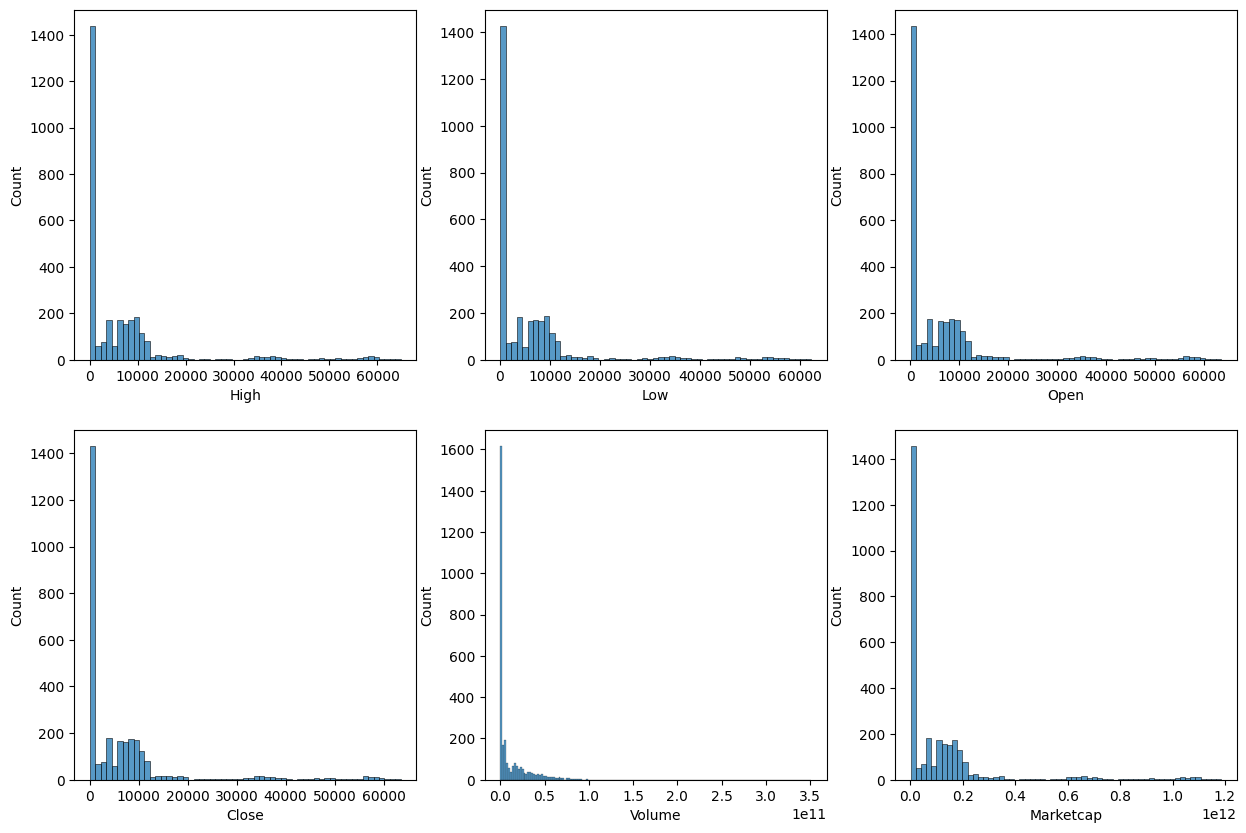

In [8]:
#Checking distribution of each variable
fig, ax = plt.subplots(figsize = (15, 10), nrows = 2, ncols = 3)
ax = ax.flatten()

for index, col in enumerate(btc_ds.iloc[:, -6:].columns):
    sns.histplot(btc_ds[col], ax = ax[index])

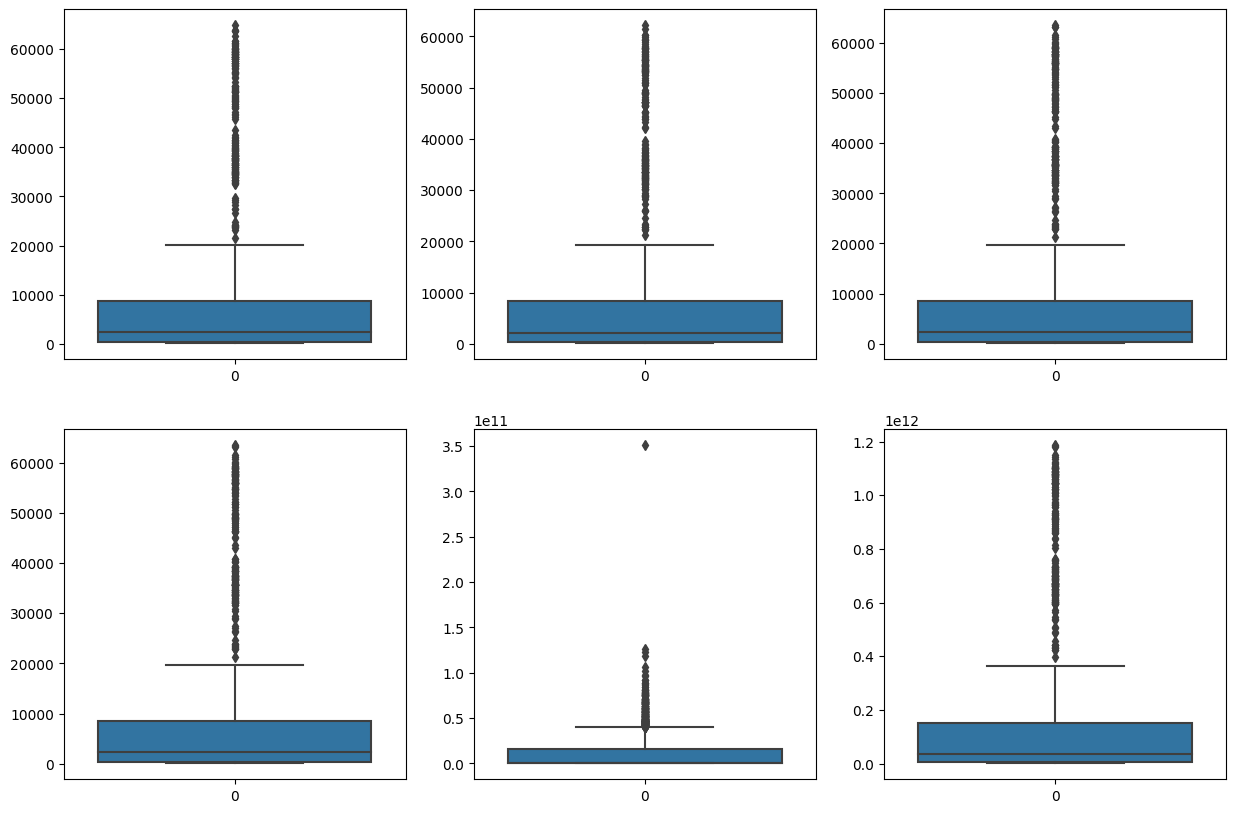

In [9]:
#Checking for outliers in each variable
fig, ax = plt.subplots(figsize = (15, 10), nrows = 2, ncols = 3)
ax = ax.flatten()

for index, col in enumerate(btc_ds.iloc[:, -6:].columns):
    sns.boxplot(btc_ds[col], ax = ax[index])

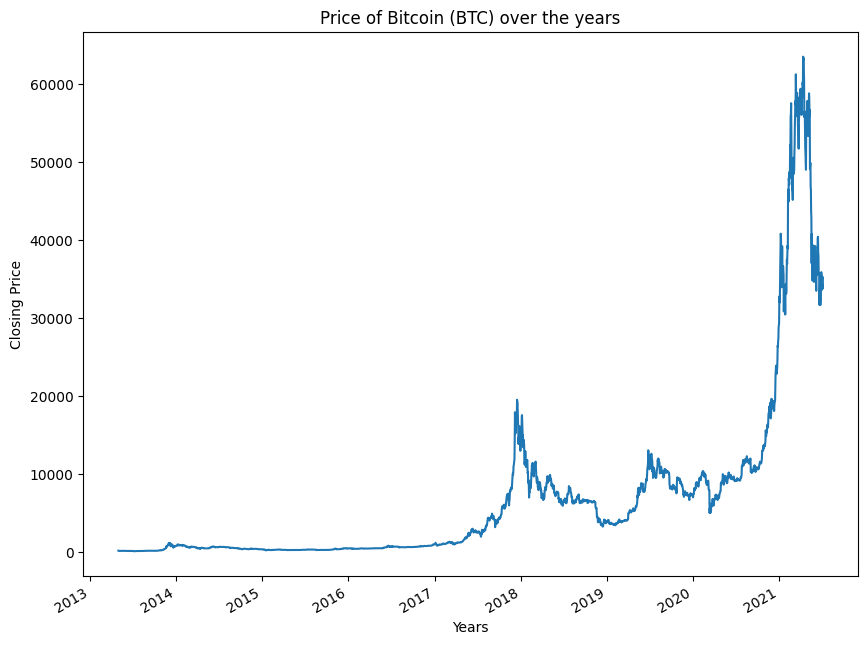

In [10]:
#Illustrating the price of Bitcoin from start date to end date
fig, ax = plt.subplots(figsize = (10, 8))
btc_ds["Close"].plot(ax = ax)
ax.set_title("Price of Bitcoin (BTC) over the years")
ax.set_xlabel("Years")
ax.set_ylabel("Closing Price")

plt.show()

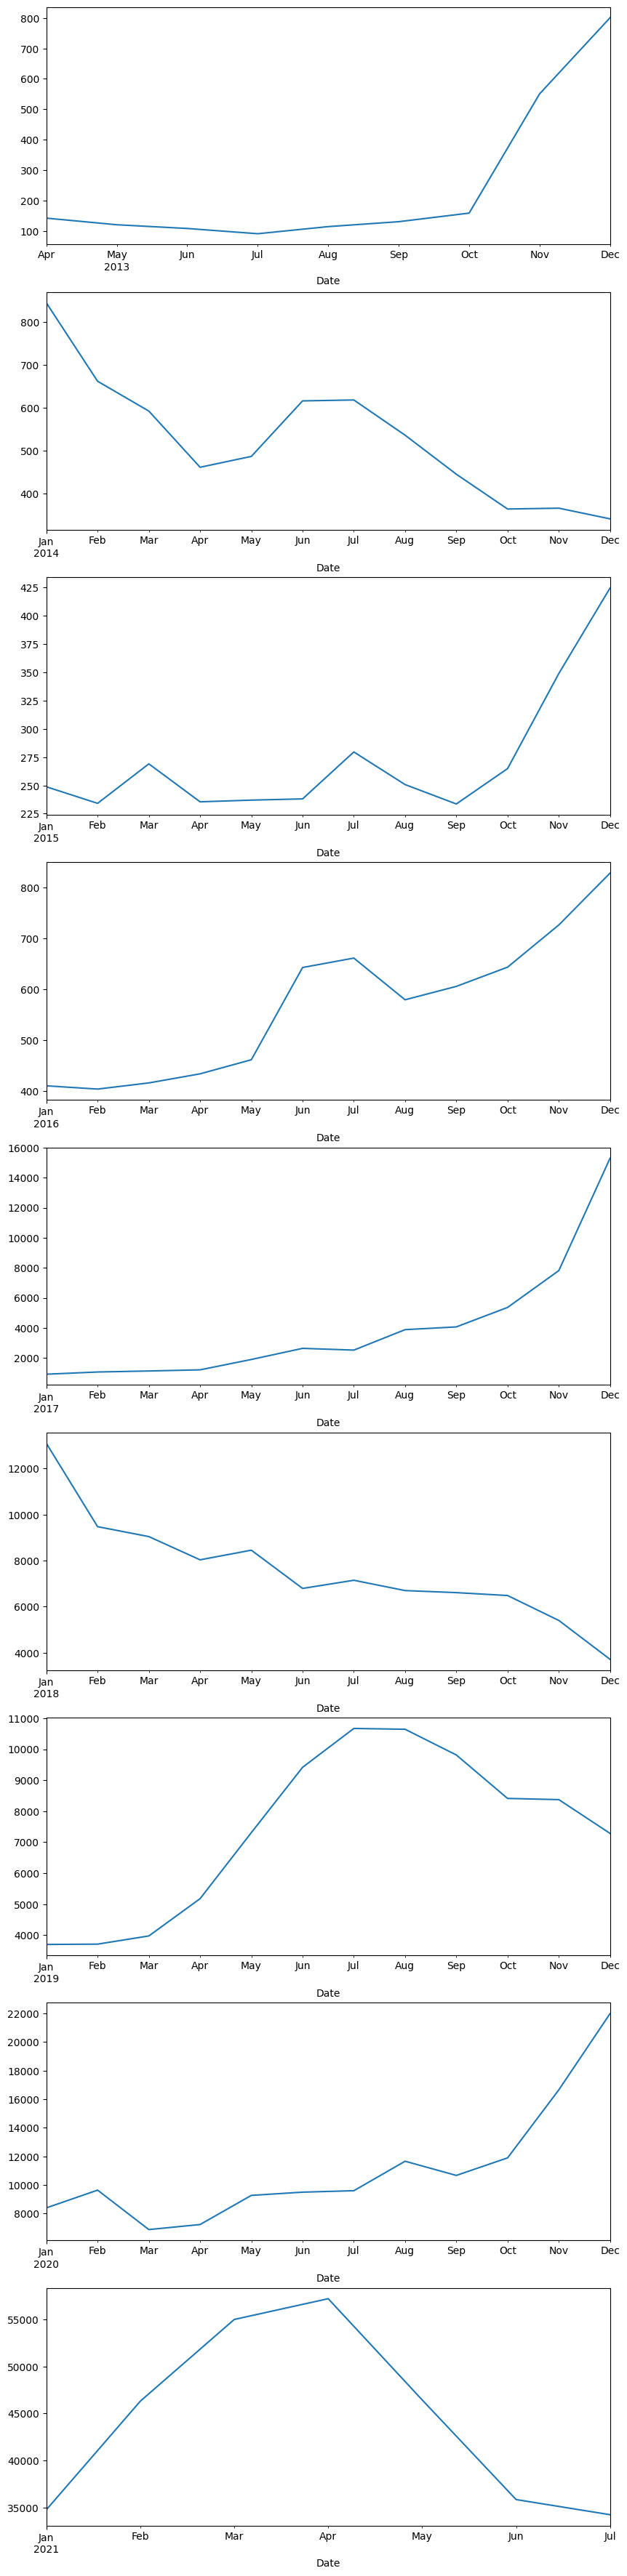

In [11]:
#Checking for seasonality
fig, ax = plt.subplots(figsize = (10, 45), ncols = 1, nrows = 9)
ax = ax.flatten()

btc_monthly = btc_ds["Close"].resample('m').mean()

for index, year in enumerate(["2013", "2014","2015", "2016", "2017", "2018", "2019", "2020", "2021"]):
    btc_monthly[year].plot(ax = ax[index])

## Data Preprocessing

In [12]:
#Train test split with a ratio of 80:20
train, test = train_test_split(btc_ds["Close"], test_size=0.2, shuffle = False, random_state=7)

In [13]:
#Reshaping the train and test dataset
train = np.array(train)
train = train.reshape(-1, 1)

test = np.array(test)
test = test.reshape(-1, 1)

In [14]:
#Defining scaler for train dataset
train_scaler = StandardScaler()

#Standardizing data for train dataset 
train_scaled = train_scaler.fit_transform(train)

In [15]:
#Displaying array of scaled train dataset
train_scaled

array([[-0.75582757],
       [-0.75730013],
       [-0.76315051],
       ...,
       [ 1.54703707],
       [ 1.52041201],
       [ 1.46297063]])

In [16]:
#Defining scaler for test dataset
test_scaler = StandardScaler()

#Standardizing data for test dataset
test_scaled = test_scaler.fit_transform(test)

In [17]:
#Displaying array of scaled test dataset
test_scaled

array([[-0.74694207],
       [-0.74538179],
       [-0.76078613],
       [-0.76669928],
       [-0.77695457],
       [-0.7989995 ],
       [-0.81884602],
       [-0.81304298],
       [-0.83310206],
       [-0.82747115],
       [-0.82332968],
       [-0.80536823],
       [-0.80929872],
       [-0.79220611],
       [-0.80319156],
       [-0.81152397],
       [-0.8173892 ],
       [-0.81749484],
       [-0.82139972],
       [-0.81014714],
       [-0.80448916],
       [-0.80395934],
       [-0.80349454],
       [-0.81286511],
       [-0.81990422],
       [-0.82338381],
       [-0.82190998],
       [-0.82038783],
       [-0.82870147],
       [-0.82711753],
       [-0.83972018],
       [-0.85645892],
       [-0.81997973],
       [-0.82421986],
       [-0.82330416],
       [-0.82488983],
       [-0.80651913],
       [-0.81546056],
       [-0.81735799],
       [-0.82007416],
       [-0.8221489 ],
       [-0.81921804],
       [-0.81761841],
       [-0.81161797],
       [-0.8190514 ],
       [-0

## Preparing data for price forecast

In [18]:
#Defining a function to split sequences into x and y
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [19]:
#Splitting training set into input and target
x_train, y_train = split_sequence(train_scaled,2 )

In [20]:
#Displaying shape of input variables in training set
x_train.shape

(2390, 2, 1)

In [21]:
#Displaying shape of target variable in training set
y_train.shape

(2390, 1)

In [22]:
#Splitting test set into input and target
x_test, y_test = split_sequence(test_scaled, 2)

In [23]:
#Displaying shape of input variables in test set
x_test.shape

(597, 2, 1)

In [24]:
#Displaying shape of target variable in test set
y_test.shape

(597, 1)

In [25]:
#Printing out the x and corresponding y
for i in range(len(y_test)):
    print(x_test[i], y_test[i])

[[-0.74694207]
 [-0.74538179]] [-0.76078613]
[[-0.74538179]
 [-0.76078613]] [-0.76669928]
[[-0.76078613]
 [-0.76669928]] [-0.77695457]
[[-0.76669928]
 [-0.77695457]] [-0.7989995]
[[-0.77695457]
 [-0.7989995 ]] [-0.81884602]
[[-0.7989995 ]
 [-0.81884602]] [-0.81304298]
[[-0.81884602]
 [-0.81304298]] [-0.83310206]
[[-0.81304298]
 [-0.83310206]] [-0.82747115]
[[-0.83310206]
 [-0.82747115]] [-0.82332968]
[[-0.82747115]
 [-0.82332968]] [-0.80536823]
[[-0.82332968]
 [-0.80536823]] [-0.80929872]
[[-0.80536823]
 [-0.80929872]] [-0.79220611]
[[-0.80929872]
 [-0.79220611]] [-0.80319156]
[[-0.79220611]
 [-0.80319156]] [-0.81152397]
[[-0.80319156]
 [-0.81152397]] [-0.8173892]
[[-0.81152397]
 [-0.8173892 ]] [-0.81749484]
[[-0.8173892 ]
 [-0.81749484]] [-0.82139972]
[[-0.81749484]
 [-0.82139972]] [-0.81014714]
[[-0.82139972]
 [-0.81014714]] [-0.80448916]
[[-0.81014714]
 [-0.80448916]] [-0.80395934]
[[-0.80448916]
 [-0.80395934]] [-0.80349454]
[[-0.80395934]
 [-0.80349454]] [-0.81286511]
[[-0.8034945

## Building the models

In [26]:
#Importing all libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Flatten, Dense, Dropout, GRU
from keras import regularizers
from keras import metrics
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [27]:
#Defining a function to set seeds to ensure reproducibility of the experiments
def set_seed(seed):
    np.random.seed(seed)
    rn.seed(seed)
    tf.random.set_seed(seed)
    
    return

### Experiment 1: 1D CNN

#### Convolutional Neural Network

The convolutional neural network (CNN) is commonly used for image processing problems, but can be applied to time series analysis as well. The CNN is well known as a feature extractor in the literature and possesses huge potential to extract hidden complex patterns in time series data. It allows for the extraction of valuable features without the need for extensive domain knowledge on the time series problem. 

Two main components of the CNN are :
<li>Convolution layer - applying and sliding a filter through a one-dimensional (time-series) data to generate feature maps</li>
<li>Pooling layer - reduces the dimension of the feature maps through a sum pooling or max pooling operation</li>


In [28]:
#Defining kernel initializer to ensure reproducibility of the experiments
initializer = tf.keras.initializers.GlorotUniform(seed=7)

In [29]:
#Defining a function to create a CNN model
def create_cnn():
  model = Sequential()
  #Input layer
  model.add(Conv1D(filters=80, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=initializer))
  model.add(Flatten())
  #Hidden layer
  model.add(Dense(50, activation='relu', kernel_initializer=initializer))
  model.add(Dropout(0.2))
  #Output layer
  model.add(Dense(1,kernel_initializer=initializer))
  model.compile(optimizer='adam', loss='mse')
  return(model)

In [30]:
#Creating CNN model
cnn = create_cnn()

In [31]:
# cnn.save_weights("cnn_primer_weights.h5")
# cnn.load_weights("cnn_primer_weights.h5")

In [32]:
#CNN model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 80)             240       
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 50)                4050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,341
Trainable params: 4,341
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Set seed
set_seed(7)

#Fitting CNN model to training data
cnn_history = cnn.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size=32)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 0.1150 - val_loss: 0.0105
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0079
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.0151
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.0152
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0078
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.0094
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0134
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0119
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0072
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0067
Epoch 11/

In [34]:
#Prediction using CNN model
cnn_predict = cnn.predict(x_test)

#Inverse scaling the predicted 
cnn_predict = test_scaler.inverse_transform(cnn_predict)

19/19 [==============================] - 0s 893us/step


In [35]:
#Inverse scaling the target in test set 
real_price = test_scaler.inverse_transform(y_test)

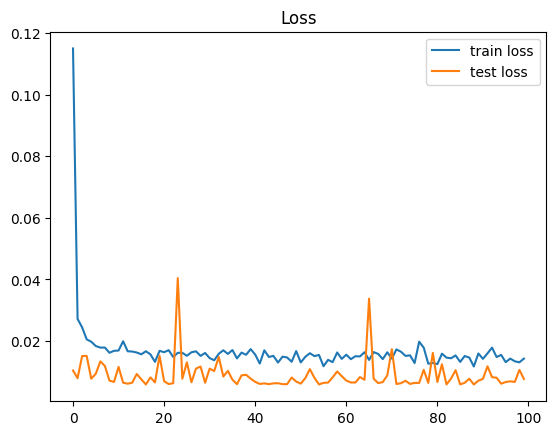

In [36]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

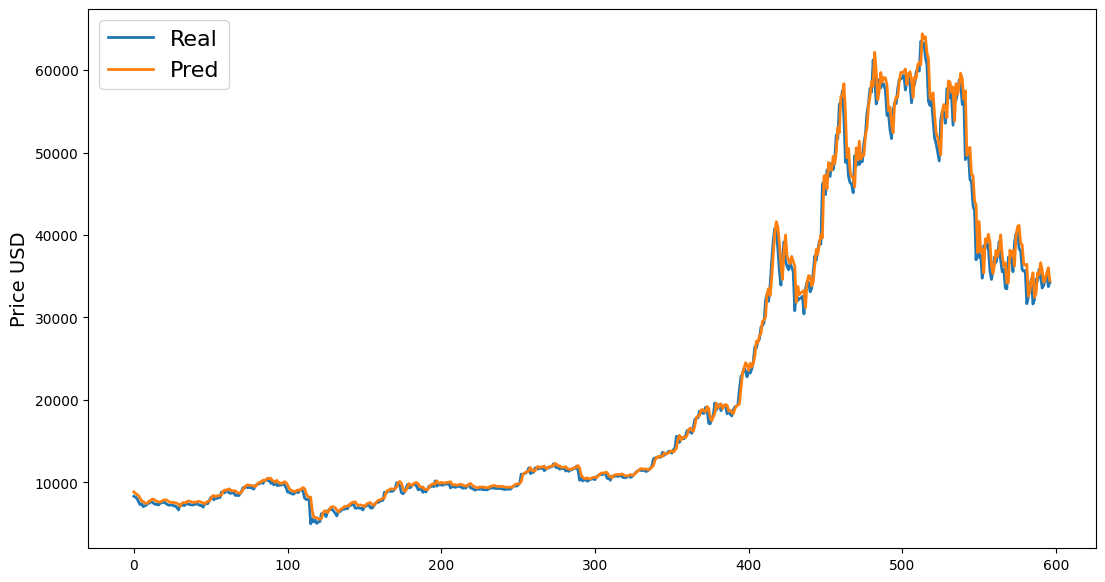

In [37]:
#Plotting predicted price using CNN and real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(cnn_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [38]:
#Defining a function to generate RMSE and MAPE
def generate_evaluation_metrics(real, predicted):
  RMSE = np.sqrt(mean_squared_error(real, predicted))
  MAPE = mean_absolute_percentage_error(real, predicted)
  print("The RMSE is:", RMSE)
  print("The MAPE is:", MAPE)

In [39]:
#Generating RMSE and MAPE
generate_evaluation_metrics(real_price, cnn_predict)

The RMSE is: 1298.1123631756568
The MAPE is: 0.03553118322407081


### Experiment 2: 1D CNN with early stopping

#### Early stopping callback
The early stopping callback mechanism can be used to fine-tune deep learning algorithms. This mechanism allows the termination of model training when a certain metric (e.g, validation loss) does not improve over a specified number of epochs. By doing so, it prevents the model from overfitting to the train data and result in a more generalizable model.

In [40]:
#Creating CNN model
cnn_es = create_cnn()

In [41]:
# cnn_es.load_weights("cnn_primer_weights.h5")

In [42]:
#Defining early stopping mechanism
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0,
    verbose=2,
    mode="auto",
    restore_best_weights=True)

In [43]:
#Set seed
set_seed(7)

#Fitting CNN model to training data with early stopping
cnn_es_history = cnn_es.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size=32, callbacks= [early_stopping])

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 0.1150 - val_loss: 0.0105
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.0079
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.0151
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.0152
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0078
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0094
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0134
Epoch 8/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0119
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0072
Epoch 10/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0067
Epoch 11/

In [44]:
#Prediction using CNN model with early stopping
cnn_es_predict = cnn_es.predict(x_test)

#Inverse scaling the predicted values
cnn_es_predict = test_scaler.inverse_transform(cnn_es_predict)

19/19 [==============================] - 0s 1ms/step


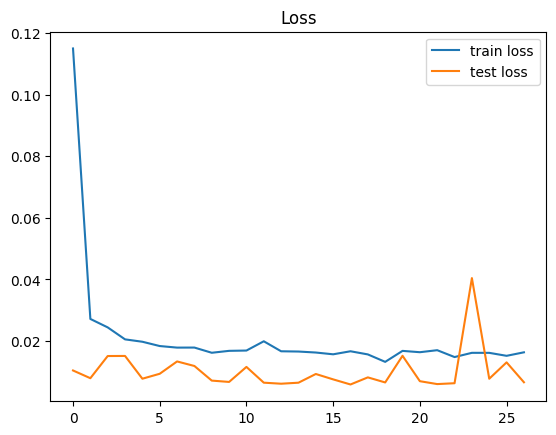

In [45]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(cnn_es_history.history['loss'], label='train loss')
plt.plot(cnn_es_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

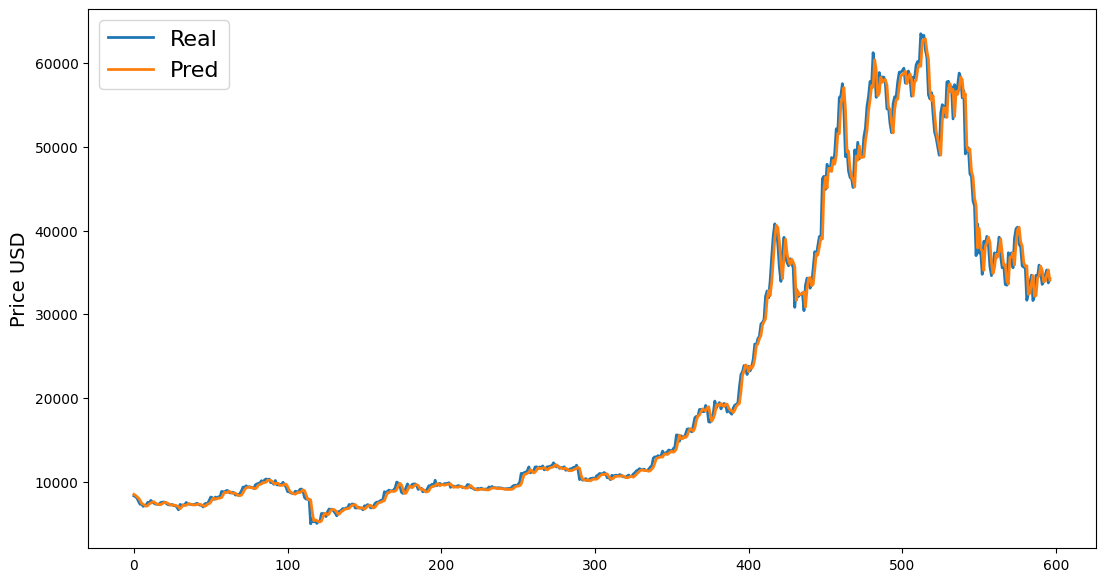

In [46]:
#Plotting predicted price using CNN with early stopping and real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(cnn_es_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [47]:
#Generating RMSE and MAPE
generate_evaluation_metrics(real_price, cnn_es_predict)

The RMSE is: 1217.7889316742258
The MAPE is: 0.02942855972930143


### Experiment 3: GRU

#### Gated Recurrent Units
The gated recurrent unit (GRU) is a recurrent neural network style architecture and is considered to be a variant of the long short term memory (LSTM) neural network. GRU is excellent for tasks involving temporal or sequential data, as they can capture long term temporal dependencies. Similar to the LSTM, the GRU uses gating mechanisms, but differs in the number of gates and the functions of these gates. The GRU has two gates:
<li>Update gate - mechanism to decide what information to add to the network or throw away</li>
<li>Reset gate - mechanism to determine the amount of information to forget</li>

Resultant from having less gates, the GRU has a simpler architecture compared to the LSTM but it is still capable of addressing the vanishing or exploding gradient problem prevalent in conventional recurrent neural networks.

In [48]:
#Defining a function to create GRU model
def create_gru():
  model = Sequential()
  # Input layer
  model.add(GRU (units = 64, return_sequences = True, input_shape = [x_train.shape[1], x_train.shape[2]], kernel_initializer=initializer))
  model.add(Dropout(0.2)) 
  # Hidden layer
  model.add(GRU(units = 64, kernel_initializer=initializer)) 
  model.add(Dense(units = 1, kernel_initializer=initializer)) 
  #Compile model
  model.compile(optimizer= 'adam',loss='mse')
  return(model)

In [49]:
#Creating GRU model
gru = create_gru()

In [50]:
# gru.save_weights("gru_primer_weights.h5")
# gru.load_weights("gru_primer_weights.h5")

In [51]:
#GRU model summary
gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 2, 64)             12864     
                                                                 
 dropout_2 (Dropout)         (None, 2, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Set seed
set_seed(7)

#Fitting GRU model to training data 
gru_history = gru.fit(x_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 32)

Epoch 1/100
60/60 [==============================] - 5s 19ms/step - loss: 0.1050 - val_loss: 0.0077
Epoch 2/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 3/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0080 - val_loss: 0.0117
Epoch 5/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0087 - val_loss: 0.0124
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0095 - val_loss: 0.0079
Epoch 8/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 9/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 10/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0097 - val_loss: 0.0152

In [53]:
#Prediction using GRU model
gru_predict = gru.predict(x_test)

#Inverse scaling predicted values
gru_predict = test_scaler.inverse_transform(gru_predict)

19/19 [==============================] - 1s 3ms/step


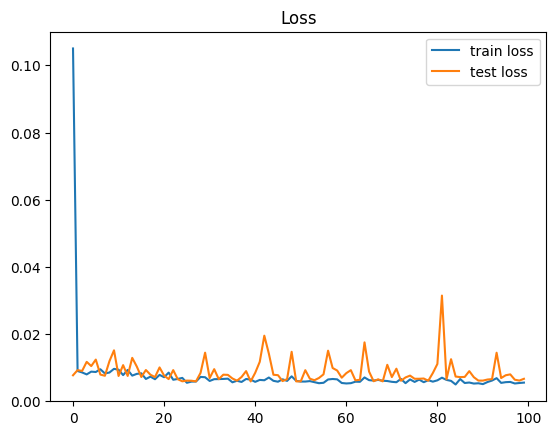

In [54]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(gru_history.history['loss'], label='train loss')
plt.plot(gru_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

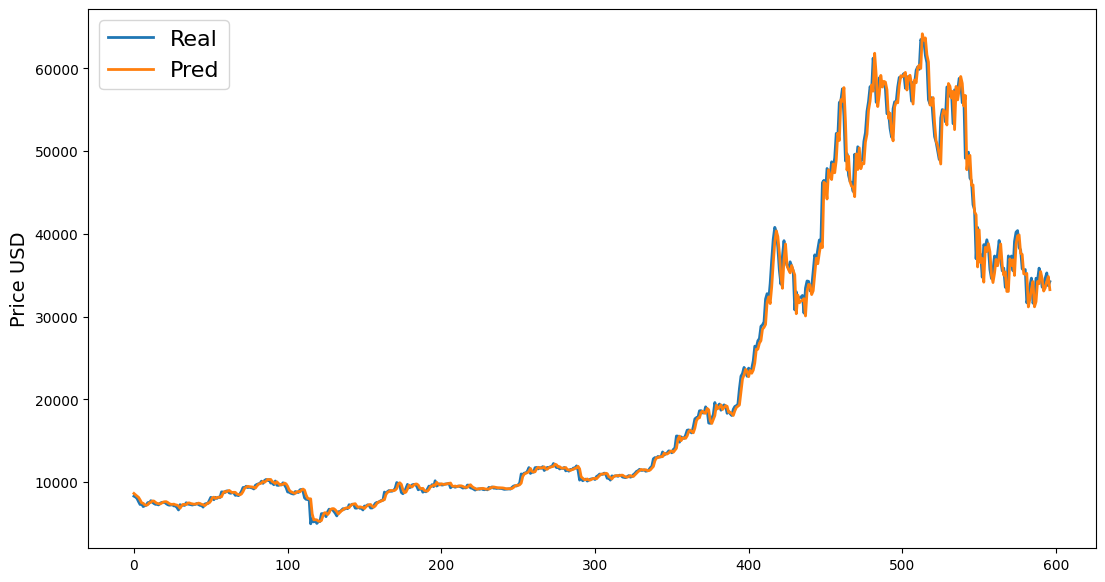

In [55]:
#Plotting GRU predicted prices against real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(gru_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [56]:
#Generate RMSE and MAPE
generate_evaluation_metrics(real_price, gru_predict)

The RMSE is: 1271.1232478626803
The MAPE is: 0.028619844507251063


### Experiment 4: GRU with early stopping

In [57]:
#Creating GRU model
gru_es = create_gru()

In [58]:
# gru_es.load_weights("gru_primer_weights.h5")

In [59]:
#Defining early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0,
    verbose=2,
    mode="auto",
    restore_best_weights=True)

In [60]:
#Set seed
set_seed(7)

#Fitting GRU model to training data with early stopping
gru_es_history = gru_es.fit(x_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 32, callbacks= [early_stopping])

Epoch 1/100
60/60 [==============================] - 4s 18ms/step - loss: 0.1050 - val_loss: 0.0077
Epoch 2/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 3/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0080 - val_loss: 0.0117
Epoch 5/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0088 - val_loss: 0.0105
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0087 - val_loss: 0.0124
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0095 - val_loss: 0.0079
Epoch 8/100
60/60 [==============================] - 1s 11ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 9/100
60/60 [==============================] - 1s 10ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 10/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.0152


In [61]:
#Prediction using GRU model with early stopping
gru_es_predict = gru_es.predict(x_test)

#Inverse scaling predicted values
gru_es_predict = test_scaler.inverse_transform(gru_es_predict)

19/19 [==============================] - 1s 3ms/step


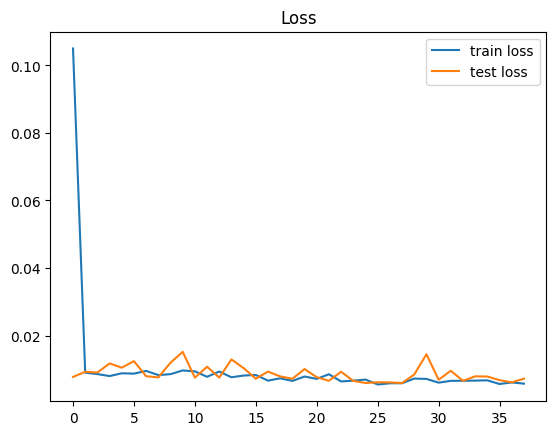

In [62]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(gru_es_history.history['loss'], label='train loss')
plt.plot(gru_es_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

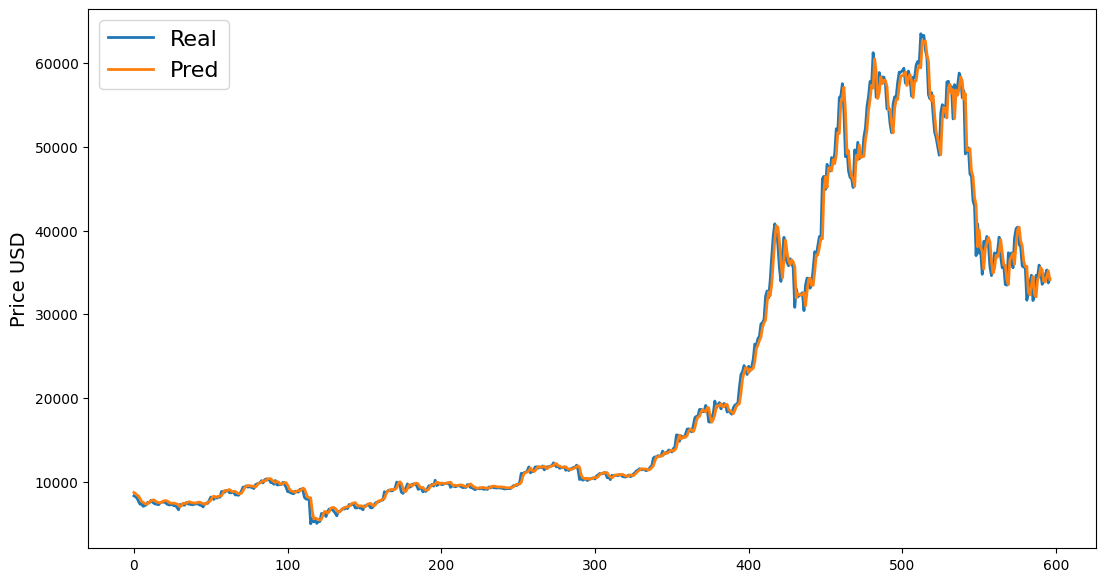

In [63]:
#Plotting GRU with early stopping predicted prices against real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(gru_es_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [64]:
#Generating RMSE and MAPE
generate_evaluation_metrics(real_price, gru_es_predict)

The RMSE is: 1221.9578179196767
The MAPE is: 0.03042840265302296


### Experiment 5: CNN-GRU

In [65]:
#Defining a function to create CNN-GRU model
def create_cnn_gru(optimizer = "adam"):
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=1, activation= 'relu', input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=initializer))
  #Hidden layers
  model.add(Conv1D(filters=124, kernel_size=2, activation = 'relu', padding = 'same',kernel_initializer=initializer))
  model.add(MaxPooling1D(pool_size= 2))
  model.add(GRU(units = 70, return_sequences= True, kernel_initializer=initializer))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(units = 16, kernel_initializer=initializer))
  model.add(Dropout(0.2))
  #Output layer
  model.add(Dense(units = 1, kernel_initializer=initializer))
  model.compile(optimizer = optimizer, loss = 'mse')
  return(model)

In [66]:
# #Creating CNN-GRU model
cnn_gru = create_cnn_gru()

In [67]:
# #CNN-GRU model summary
cnn_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 64)             128       
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 124)            15996     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 124)           0         
 )                                                               
                                                                 
 gru_4 (GRU)                 (None, 1, 70)             41160     
                                                                 
 dropout_4 (Dropout)         (None, 1, 70)             0         
                                                                 
 flatten_2 (Flatten)         (None, 70)                0         
                                                      

In [68]:
# cnn_gru.save_weights("cnn_gru_primer_weights.h5")
# cnn_gru.load_weights("cnn_gru_primer_weights.h5")

In [69]:
#Set seed
set_seed(7)

#Fitting CNN-GRU model to train data
cnn_gru_history = cnn_gru.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32)

Epoch 1/100
60/60 [==============================] - 3s 19ms/step - loss: 0.1582 - val_loss: 0.0066
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 0.0351 - val_loss: 0.0084
Epoch 3/100
60/60 [==============================] - 1s 12ms/step - loss: 0.0324 - val_loss: 0.0150
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 0.0269 - val_loss: 0.0147
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0308 - val_loss: 0.0069
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 0.0240 - val_loss: 0.0061
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0273 - val_loss: 0.0305
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0237 - val_loss: 0.0074
Epoch 9/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0257 - val_loss: 0.0062
Epoch 10/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0247 - val_loss: 0.0074
Epoch 1

In [70]:
#Prediction using CNN-GRU model
cnn_gru_predict = cnn_gru.predict(x_test)

#Inverse scaling predicted values
cnn_gru_predict = test_scaler.inverse_transform(cnn_gru_predict)

19/19 [==============================] - 1s 5ms/step


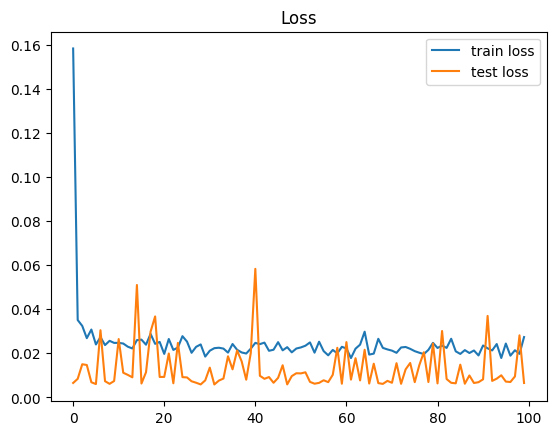

In [71]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(cnn_gru_history.history['loss'], label='train loss')
plt.plot(cnn_gru_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

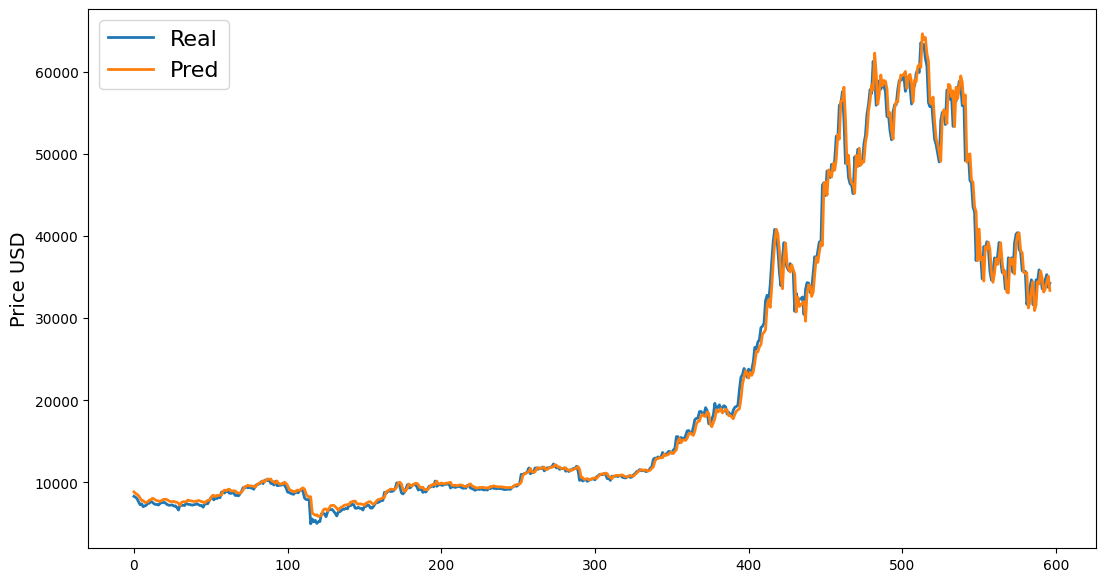

In [72]:
#Plotting predicted price using CNN-GRU and real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(cnn_gru_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [73]:
#Generating RMSE and MAPE
generate_evaluation_metrics(real_price, cnn_gru_predict)

The RMSE is: 1300.9821200045342
The MAPE is: 0.038007520344083584


### Experiment 6: CNN-GRU with early stopping

In [74]:
#Creating CNN-GRU model
cnn_gru_es = create_cnn_gru()

In [75]:
# cnn_gru_es.load_weights("cnn_gru_primer_weights.h5")

In [76]:
#Set seed
set_seed(7)

#Fitting CNN-GRU model to training data with early stopping
cnn_gru_es_history = cnn_gru_es.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32, callbacks=[early_stopping])

Epoch 1/100
60/60 [==============================] - 3s 19ms/step - loss: 0.1582 - val_loss: 0.0066
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 0.0351 - val_loss: 0.0084
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.0150
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0147
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0308 - val_loss: 0.0069
Epoch 6/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0240 - val_loss: 0.0061
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0273 - val_loss: 0.0305
Epoch 8/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0237 - val_loss: 0.0074
Epoch 9/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0257 - val_loss: 0.0062
Epoch 10/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0247 - val_loss: 0.0074
Epoch 11

In [77]:
#Prediction using CNN-GRU model with early stopping
cnn_gru_es_predict = cnn_gru_es.predict(x_test)

#Inverse scaling predicted values
cnn_gru_es_predict = test_scaler.inverse_transform(cnn_gru_es_predict)

19/19 [==============================] - 0s 2ms/step


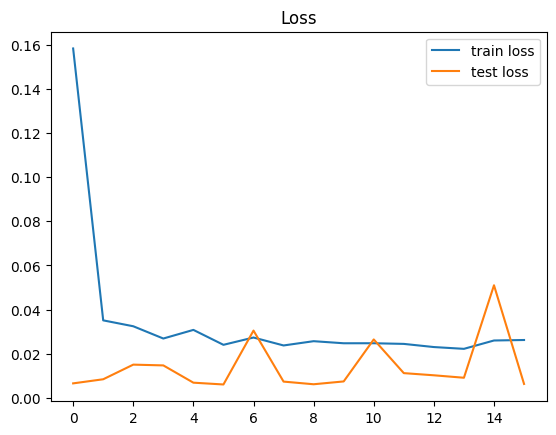

In [78]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(cnn_gru_es_history.history['loss'], label='train loss')
plt.plot(cnn_gru_es_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

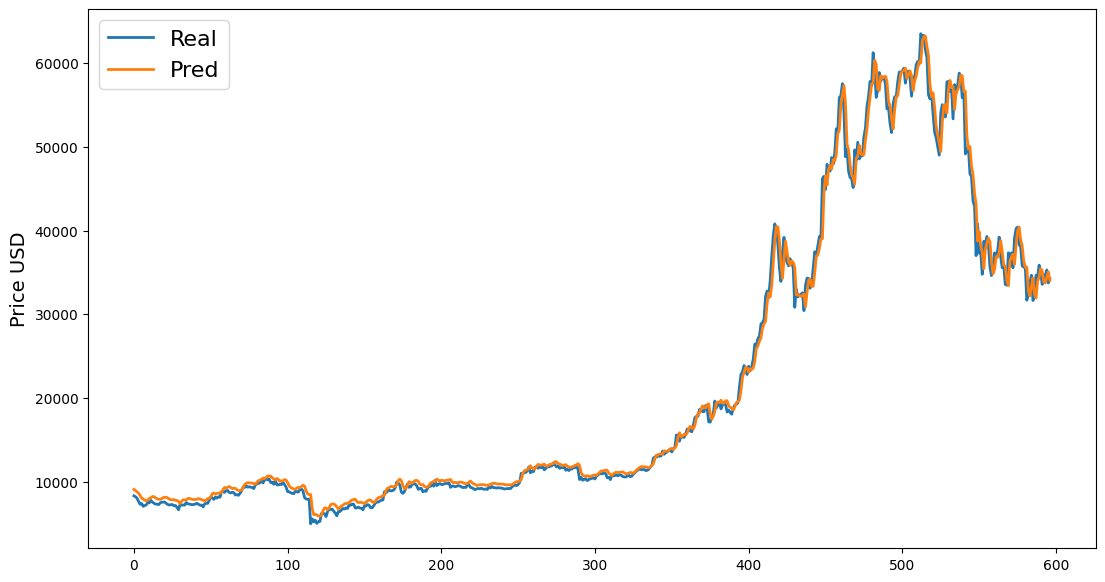

In [79]:
#Plotting predicted price using CNN-GRU with early stopping and real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(cnn_gru_es_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [80]:
#Generate RMSE and MAPE
generate_evaluation_metrics(real_price, cnn_gru_es_predict)

The RMSE is: 1284.3163447781762
The MAPE is: 0.048024265745526096


### Experiment 7: Hyperparameter Tuning (grid search) for CNN-GRU 

#### Batch Size and Epochs
<li>Batch size - number of samples processed before the model weights are updated</li> 
<li>Epochs - cycles through the full training dataset</li>

In [84]:
# #Grid search to tune hyperparameters (epochs and batch size)
from scikeras.wrappers import KerasRegressor 

# Set seed
set_seed(7)

# #Create CNN-GRU model
cnn_gru_model = KerasRegressor(model=create_cnn_gru, random_state=7)

# #Defining the grid search parameters
batch_size = [16, 32, 48, 64, 80]
epochs = [20, 40, 80, 100]

# #Grid search
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=cnn_gru_model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
epoch_batch_size_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Epoch 1/20
75/75 [==============================] - 3s 7ms/step - loss: 0.1462
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0347
Epoch 3/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0323
Epoch 4/20
75/75 [==============================] - 1s 7ms/step - loss: 0.0313
Epoch 5/20
75/75 [==============================] - 0s 7ms/step - loss: 0.0277
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0280
Epoch 7/20
75/75 [==============================] - 0s 7ms/step - loss: 0.0277
Epoch 8/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0318
Epoch 9/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 10/20
75/75 [==============================] - 0s 5ms/step - loss: 0.0262
Epoch 11/20
75/75 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 12/20
75/75 [==============================] - 1s 7ms/step - 

In [85]:
# #Define a function to generate grid search results
def generate_grid_search_results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [86]:
#Displaying grid search results (epochs and batch size)
generate_grid_search_results(epoch_batch_size_result)

Best: 0.974918 using {'batch_size': 32, 'epochs': 20}
0.935863 (0.061904) with: {'batch_size': 16, 'epochs': 20}
0.161711 (1.421764) with: {'batch_size': 16, 'epochs': 40}
-0.045322 (1.776292) with: {'batch_size': 16, 'epochs': 80}
0.875776 (0.187082) with: {'batch_size': 16, 'epochs': 100}
0.974918 (0.004094) with: {'batch_size': 32, 'epochs': 20}
0.886724 (0.119802) with: {'batch_size': 32, 'epochs': 40}
0.952095 (0.025076) with: {'batch_size': 32, 'epochs': 80}
0.472819 (0.915731) with: {'batch_size': 32, 'epochs': 100}
0.904554 (0.100314) with: {'batch_size': 48, 'epochs': 20}
0.961262 (0.025412) with: {'batch_size': 48, 'epochs': 40}
0.929034 (0.071497) with: {'batch_size': 48, 'epochs': 80}
0.939642 (0.081339) with: {'batch_size': 48, 'epochs': 100}
0.662206 (0.536213) with: {'batch_size': 64, 'epochs': 20}
0.953021 (0.025191) with: {'batch_size': 64, 'epochs': 40}
0.948243 (0.055027) with: {'batch_size': 64, 'epochs': 80}
0.947007 (0.046201) with: {'batch_size': 64, 'epochs': 10

#### Optimizers
<li>Optimizers - a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate</li>

In [95]:
# #Grid search to tune hyperparameters (optimizer)
# #Set seed
set_seed(7)
# #Create CNN-GRU model
cnn_gru_model = KerasRegressor(model=create_cnn_gru, random_state=7)

# #Define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

# #Grid search
grid = GridSearchCV(estimator=cnn_gru_model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
optimizer_result = grid.fit(x_train, y_train)

In [96]:
# #Displaying grid search results (optimizer)
generate_grid_search_results(optimizer_result)

Best: 0.837925 using {'optimizer': 'SGD'}
0.837925 (0.261298) with: {'optimizer': 'SGD'}
0.837925 (0.261298) with: {'optimizer': 'RMSprop'}
0.837925 (0.261298) with: {'optimizer': 'Adagrad'}
0.837925 (0.261298) with: {'optimizer': 'Adadelta'}
0.837925 (0.261298) with: {'optimizer': 'Adam'}
0.837925 (0.261298) with: {'optimizer': 'Adamax'}
0.837925 (0.261298) with: {'optimizer': 'Nadam'}


### Experiment 8: CNN-GRU with optimized hyperparameters

In [81]:
# #Creating CNN-GRU model
cnn_gru_opt = create_cnn_gru(optimizer="SGD")

In [82]:
# #CNN-GRU model summary
cnn_gru_opt.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 2, 64)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 124)            15996     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 124)           0         
 1D)                                                             
                                                                 
 gru_6 (GRU)                 (None, 1, 70)             41160     
                                                                 
 dropout_8 (Dropout)         (None, 1, 70)             0         
                                                                 
 flatten_4 (Flatten)         (None, 70)                0         
                                                      

In [97]:
#Set seed
set_seed(7)

#Fitting CNN-GRU model to train data
cnn_gru_opt_history = cnn_gru_opt.fit(x_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 32)

Epoch 1/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0293 - val_loss: 0.0061
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0292 - val_loss: 0.0063
Epoch 3/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0307 - val_loss: 0.0062
Epoch 4/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0291 - val_loss: 0.0063
Epoch 5/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0296 - val_loss: 0.0062
Epoch 6/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0266 - val_loss: 0.0062
Epoch 7/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0267 - val_loss: 0.0061
Epoch 8/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0289 - val_loss: 0.0061
Epoch 9/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0251 - val_loss: 0.0061
Epoch 10/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0287 - val_loss: 0.0061
Epoch 11/20
60/60 

In [98]:
#Prediction using CNN-GRU model
cnn_gru_opt_predict = cnn_gru_opt.predict(x_test)

#Inverse scaling predicted values
cnn_gru_opt_predict = test_scaler.inverse_transform(cnn_gru_opt_predict)

19/19 [==============================] - 0s 2ms/step


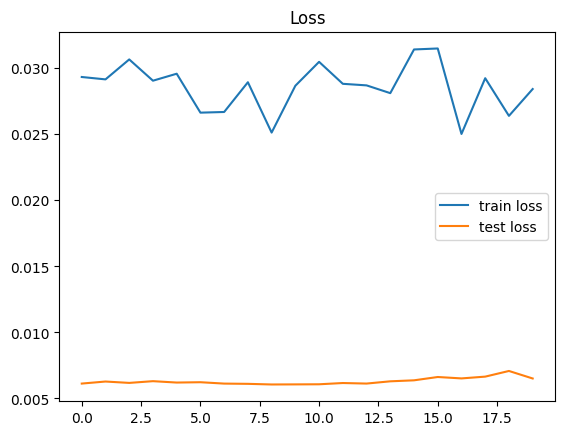

In [99]:
#Plotting train and test loss
plt.title('Loss')
plt.plot(cnn_gru_opt_history.history['loss'], label='train loss')
plt.plot(cnn_gru_opt_history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

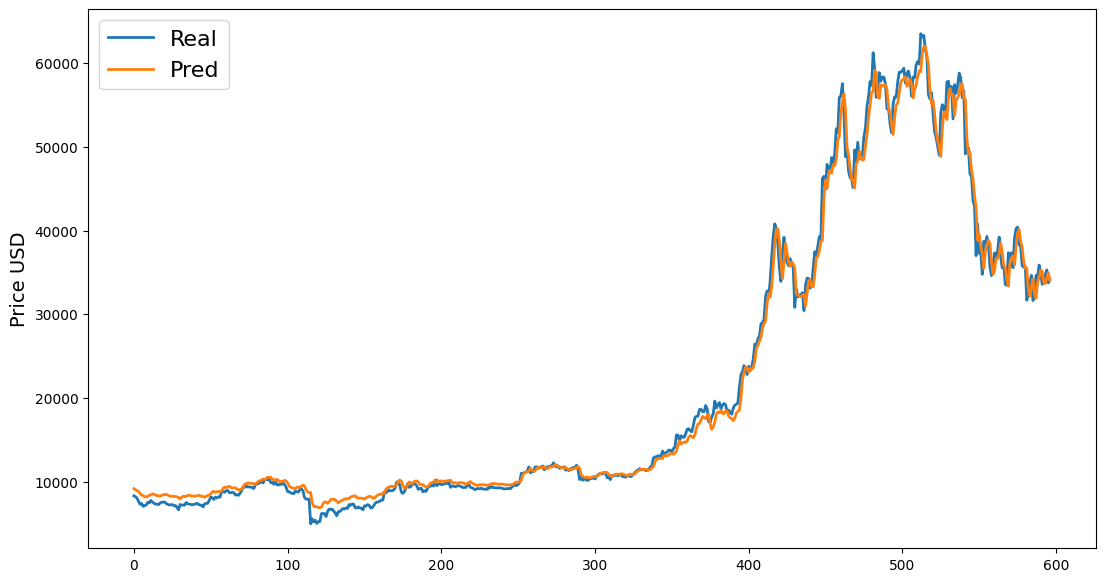

In [100]:
#Plotting predicted price using CNN-GRU and real price
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(cnn_gru_opt_predict, label='Pred', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)
plt.show()

In [101]:
#Generating RMSE and MAPE
generate_evaluation_metrics(real_price, cnn_gru_opt_predict)

The RMSE is: 1383.8220689105842
The MAPE is: 0.06067907547883042


### Conclusion
<li>Early stopping callbacks have improved the performance of baseline deep learning models by reducing overfitting.</li>
<li>A simple one-dimensional CNN has performed the best for Bitcoin price forecast.</li>
<li>The CNN-GRU model performed the worst, probably due to the fact that 1) there's not enough data, 2) too many learnable parameters and 3) potential model overfitting. 